<a href="https://colab.research.google.com/github/ManavKaul/IPL_Analysis/blob/main/Indian_Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALYSIS OF IMPACT OF TOSS ON RESULT OF INDIAN PREMIER LEAGUE

DATA  TAKEN FROM KAGGLE

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
#Creating a dataframe for matches
df_matches = pd.read_csv('matches.csv')

In [ ]:
#Selecting top 10 rows from the dataframe
df_matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
#Finding Number of matches won by each team
df_matches['winner'].sort_values().value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
# Grouping the number of matched won by teams and sorting it based on the count of the matches.
winners_df_matches = df_matches.groupby('winner', sort = False).count().id.sort_values(ascending = False)


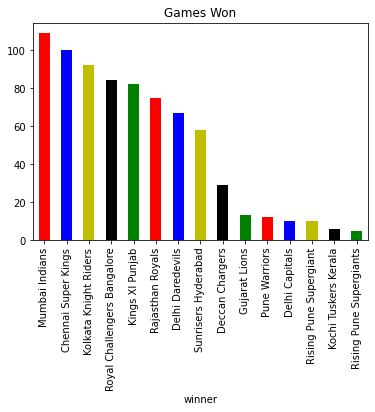

In [ ]:
# Plotting a chart for winners
winners_df_matches.plot(kind = 'bar', title = 'Games Won', label = 'Number of wins',color=['r','b','y','k','g'] )

As You Can Mumbai Indians and Chennai Super Kings are the only teams so far to have won more than 100 games.
Teams which have played all seasons have more number of matches won
Teams to win the least have also played the least seasons

In [ ]:
#Matches where winning team that won the toss also 
winning_toss = df_matches[(df_matches['toss_winner'] == df_matches['winner'])]
#Matches where winning team that lost the toss 
loss_toss = df_matches[(df_matches['toss_winner'] != df_matches['winner'])]

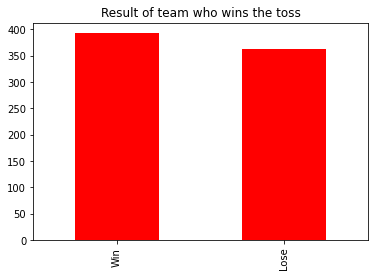

In [ ]:
#Plotting the toss data
df_toss =pd.DataFrame({"Team won the toss":[ winning_toss.shape[0],loss_toss.shape[0]  ]}, index = ['Win', 'Lose'])
df_toss.plot( kind = 'bar' , legend = False , title = "Result of team who wins the toss",color=['r'])

WE CAN SEE THAT WINNING TOSS HAS NO SIGNIFICANT INFLUENCE OVER MATCH OUTCOME AS BOTH ARE NEARLY THE SAME

In [ ]:
team_batting_first_won = df_matches.loc[(df_matches['toss_winner'] == df_matches['winner']) & (df_matches['toss_decision'] == 'bat'), ['id', 'winner']]
team_fielding_first_won = df_matches.loc[(df_matches['toss_winner'] == df_matches['winner']) & (df_matches['toss_decision'] == 'field'),  ['id', 'winner']]

In [ ]:
team_fielding_first_won_df= team_fielding_first_won['winner'].value_counts()
team_batting_first_won_df = team_batting_first_won['winner'].value_counts()

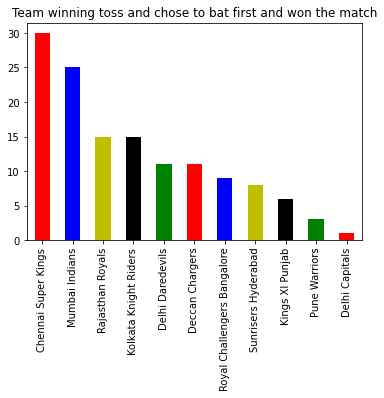

In [ ]:
#Plotting for number of times each team won toss and chose to bat first and went on to win the match
team_batting_first_won_df.plot(kind = 'bar', title = 'Team winning toss and chose to bat first and won the match',color=['r','b','y','k','g'])

FROM THE PLOT **ABOVE** AND **BELOW** ON COMPARISON IT IS CLEAR THAT

MUMBAI INDIANS AND CSK PREFER TO BAT FIRST ON WINNING TOSS 

RCB AND KKR PREFER TO BOWL FIRST ON WINNING THE TOSS

THIS IS SIGNIFICANT AS DATA PREVIOUSLY REVEALED MI & CSK TO BE THE STRONGEST TEAMS WITH MOST WINS

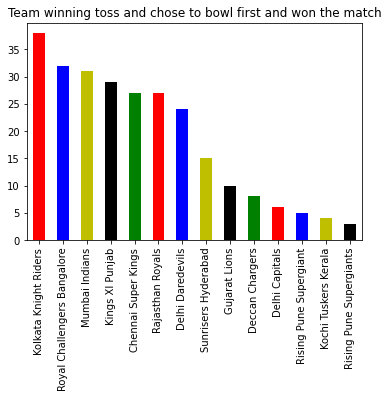

In [ ]:
#Plotting for number of times each team won toss and chose to bowl first and went on to win the match
team_fielding_first_won_df.plot(kind = 'bar', title = 'Team winning toss and chose to bowl first and won the match',color=['r','b','y','k','g'])

# **CONCLUSION**
IPL is a fast paced game. With just 20 overs to play, each and every ball counts

Even though pitch and conditions play a major role in choosing whether to field first or to bat first

However there is a huge psychological factor in terms of pressure which the chasing team has to take in this short game format with high stakes

The data analysis reveals that the teams which chose to bat first on winning toss have a higher success rate than the teams which choose to chase 